## Advanced NLP and Accounting/Finance

In [1]:
import os
import gensim
import spacy
import nltk
from nltk.corpus import stopwords

In [2]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
nlp.max_length = 5000000

In [3]:
stop_words = stopwords.words("english")
stop_words.extend(['proc','type','mic','clear','originator','name','webmaster','www','gov','originator',
                   'key','asymmetric','dsgawrwjaw','snkk','avtbzyzmr','agjlwyk','xmzv','dtinen','twsm',
                   'sdw','oam','tdezxmm','twidaqab','mic','info','rsa','md','rsa','kn','ln','cgpgyvylqm',
                   'covp','srursowk','xqcmdgb','mdyso','zjlcpvda','hx','lia','form','period','ended',])

In [4]:
source_dir = 'D:/Data/Reasonable_10K/'

In [5]:
def iter_documents(source_dir):
    i=1
    for root, dirs, files in os.walk(source_dir):
        for fname in files:
            document = open(os.path.join(root, fname)).read().split('</Header>')[1]
            tokens = gensim.utils.simple_preprocess(document)
            red_tokens = [token for token in tokens if token not in stop_words]
            doc = nlp(" ".join(red_tokens))
            lemmas = [token.lemma_ for token in doc if token.pos_ in ['NOUN']]
            print(str(i),end = '\r',flush=True)
            i+=1
            yield lemmas

In [6]:
files_to_lemmas = iter_documents(source_dir)

In [ ]:
dictionary = gensim.corpora.Dictionary(files_to_lemmas)

In [19]:
import pickle

In [20]:
# Save dump file

fp = open('dictionary.rdata','wb')
pickle.dump(dictionary,fp)
fp.close()

"# Save dump files\n\nfp = open('gender_samples.rdata','wb')\npickle.dump(bootstrap_samples_df,fp)\nfp.close()\n\nfp = open('gender_shaps.rdata','wb')\npickle.dump(bootstrap_shaps_df,fp)\nfp.close()"

In [21]:
# Load dump file

fp = open('dictionary.rdata','rb')
dictionary = pickle.load(fp)
fp.close()

In [8]:
dictionary.filter_extremes(no_below=10, no_above=0.5)

In [9]:
files_to_lemmas = iter_documents(source_dir)

In [10]:
corpus = [dictionary.doc2bow(lemmas) for lemmas in files_to_lemmas]

In [20]:
# Save dump file
fp = open('corpus.rdata','wb')
pickle.dump(dictionary,fp)
fp.close()

"# Save dump files\n\nfp = open('gender_samples.rdata','wb')\npickle.dump(bootstrap_samples_df,fp)\nfp.close()\n\nfp = open('gender_shaps.rdata','wb')\npickle.dump(bootstrap_shaps_df,fp)\nfp.close()"

In [21]:
# Load dump file
fp = open('corpus.rdata','rb')
dictionary = pickle.load(fp)
fp.close()

In [11]:
lda_model = gensim.models.ldamulticore.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=24, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=len(corpus)/20,
                                           passes=100,
                                           alpha='asymmetric',
                                           per_word_topics=False,
                                            minimum_probability=.0,
                                            eta = 'auto')

In [12]:
# Save model
lda_model.save('first_model.lda')

In [ ]:
# Load model
gensim.models.ldamulticore.LdaModel.load('first_model.lda')

In [16]:
import pyLDAvis.gensim

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

/home/mikkoranta/python3/gensim/lib/python3.8/site-packages/joblib/numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/mikkoranta/python3/gensim/lib/python3.8/site-packages/joblib/numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [18]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.219829 -0.022654       1        1  10.125388
7      0.193266 -0.054790       2        1   8.678460
23     0.105633  0.087741       3        1   7.760551
2      0.145274  0.156338       4        1   6.305946
3      0.065856  0.046595       5        1   6.100507
8     -0.229490  0.033809       6        1   5.335301
0      0.162071  0.026220       7        1   4.869668
16    -0.190286  0.089618       8        1   4.482057
1     -0.148476 -0.154485       9        1   4.317136
19     0.197808 -0.049775      10        1   3.966020
17    -0.087242 -0.139231      11        1   3.932467
5     -0.167493  0.234949      12        1   3.691004
12    -0.212735 -0.048589      13        1   3.599567
18     0.184404 -0.052803      14        1   3.539795
11     0.172426 -0.035925      15        1   3.438194
6      0.191570 -0.051441      16        1   2.965149
9     -0.210876  0.005243      17        1   2.848630
20     0.160583 -0.012536      18        1   2.476637
21    -0.057468 -0.213908      19        1   2.310122
4     -0.186369  0.163081      20        1   2.264870
10     0.184115  0.024858      21        1   2.207684
15    -0.198500 -0.129581      22        1   2.188722
22     0.166972  0.072643      23        1   1.618454
14    -0.021214  0.024624      24        1   0.977672, topic_info=             Term           Freq          Total Category  logprob  loglift
955      borrower  503587.000000  503587.000000  Default  30.0000  30.0000
839   participant  376643.000000  376643.000000  Default  29.0000  29.0000
3887       tenant  309495.000000  309495.000000  Default  28.0000  28.0000
104        lender  479924.000000  479924.000000  Default  27.0000  27.0000
3919     landlord  246832.000000  246832.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
554    possession    3397.962891   37628.031250  Topic24  -4.8801   2.2232
240        parent    3094.735596   85252.820312  Topic24  -4.9736   1.3118
45      successor    2875.541992   95410.609375  Topic24  -5.0471   1.1258
364         thing    2488.269043   57925.234375  Topic24  -5.1917   1.4802
145      attorney    2237.201172   90477.476562  Topic24  -5.2981   0.9279

[1851 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
370       1  0.075523  abatement
370       7  0.009553  abatement
370       9  0.564170  abatement
370      10  0.067232  abatement
370      13  0.016583  abatement
...     ...       ...        ...
22        9  0.006912        zip
22       16  0.790243        zip
22       18  0.010203        zip
22       23  0.022545        zip
22       24  0.003291        zip

[8748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 8, 24, 3, 4, 9, 1, 17, 2, 20, 18, 6, 13, 19, 12, 7, 10, 21, 22, 5, 11, 16, 23, 15])

In [20]:
import pandas as pd

In [21]:
top_words_df = pd.DataFrame()
for i in range(24):
    temp_words = lda_model.show_topic(i,10)
    just_words = [name for (name,_) in temp_words]
    top_words_df['Topic ' + str(i+1)] = just_words

In [37]:
top_words_df.T.to_csv('topics.csv')

In [23]:
import datetime

In [24]:
from dateutil.parser import parse

In [25]:
files = os.listdir(source_dir)

In [26]:
file_dates = [parse(item.split('_')[0]) for item in files]

In [27]:
import numpy as np

In [28]:
evolution = np.zeros([len(corpus),25])
ind = 0
for bow in corpus:
    topics = lda_model.get_document_topics(bow)
    for topic in topics:
        evolution[ind,topic[0]] = topic[1]
    ind+=1

In [29]:
evolution_df = pd.DataFrame(evolution)
evolution_df['Date'] = file_dates
evolution_df.set_index('Date',inplace=True)

In [30]:
evolution_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
1994-01-11,0.315972,0.002277,0.598000,0.001700,0.001509,0.001357,0.066930,0.001129,0.001041,0.000966,...,0.000675,0.000643,0.000613,0.000586,0.000562,0.000539,0.000519,0.000499,0.000481,0.0
1994-01-12,0.181824,0.002845,0.002432,0.002124,0.001886,0.001695,0.001540,0.001410,0.286534,0.001207,...,0.000843,0.084421,0.000766,0.000733,0.000702,0.166794,0.000648,0.000624,0.000601,0.0
1994-01-13,0.382995,0.002940,0.423047,0.082624,0.001949,0.001752,0.001591,0.001457,0.001344,0.001248,...,0.000871,0.000830,0.000792,0.000757,0.000726,0.087974,0.000670,0.000645,0.000622,0.0
1994-01-13,0.161728,0.000729,0.000623,0.076846,0.000483,0.000434,0.000394,0.000361,0.149182,0.000309,...,0.000216,0.000206,0.000196,0.000188,0.000180,0.000173,0.117813,0.000160,0.000154,0.0
1994-01-14,0.000182,0.000151,0.028138,0.000113,0.072985,0.000090,0.000082,0.266068,0.389534,0.000064,...,0.000045,0.000043,0.000041,0.000039,0.000037,0.000036,0.006716,0.000033,0.000032,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-14,0.168223,0.000269,0.000230,0.737618,0.000179,0.000160,0.000146,0.000134,0.000123,0.000114,...,0.000080,0.000076,0.011056,0.000069,0.038481,0.000064,0.000061,0.000059,0.035376,0.0
2018-12-14,0.000698,0.000580,0.030330,0.681720,0.000384,0.000345,0.000314,0.000287,0.000265,0.000246,...,0.000172,0.000164,0.000156,0.000149,0.068615,0.000137,0.000132,0.000127,0.077063,0.0
2018-12-17,0.000037,0.000031,0.124490,0.000023,0.000020,0.000018,0.000017,0.000015,0.000014,0.000013,...,0.009060,0.000009,0.000008,0.000008,0.005135,0.000007,0.000007,0.753522,0.065392,0.0


In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.style.use('bmh')

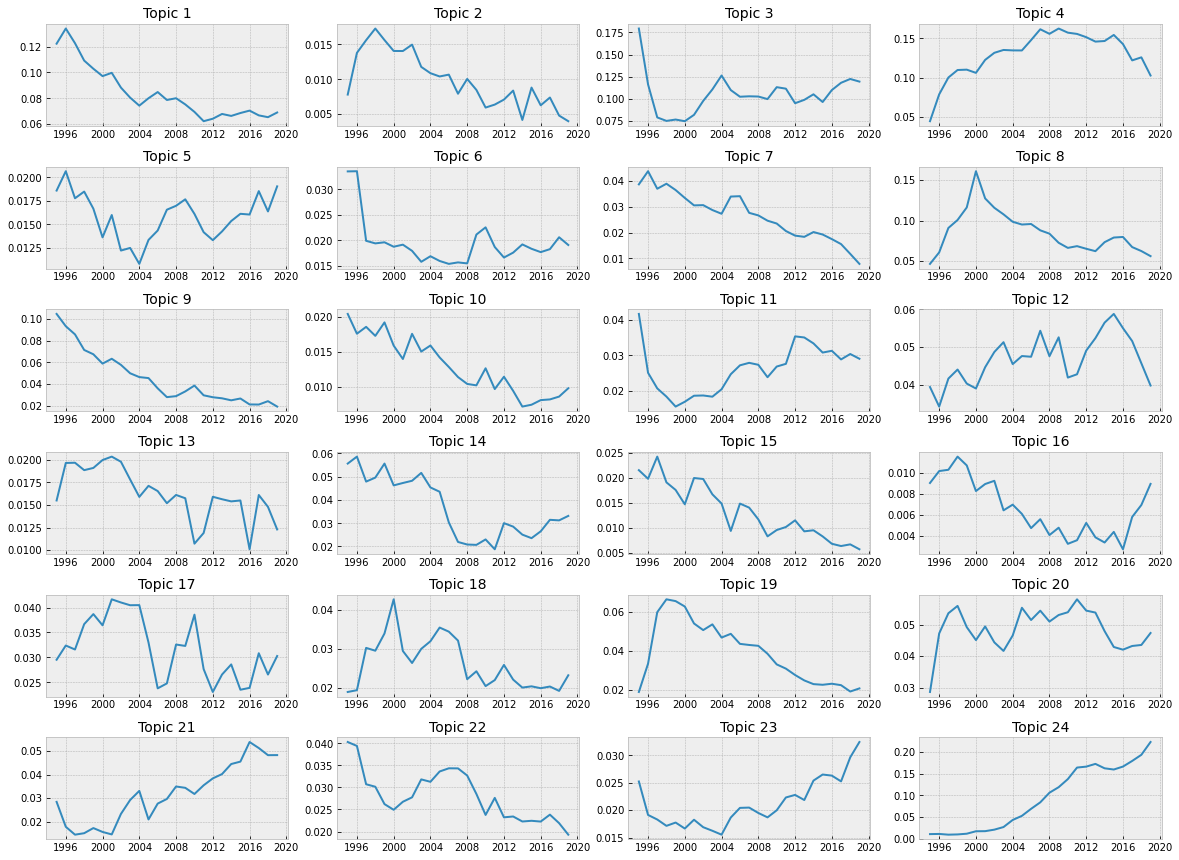

In [35]:
fig,axs = plt.subplots(6,4,figsize = [20,15])
for ax,column in zip(axs.flat,evolution_df.groupby('Date').mean().columns):
    ax.plot(evolution_df.resample('Y').mean()[column])
    ax.set_title('Topic ' + str(column+1),{'fontsize':14})
plt.subplots_adjust(hspace=0.4)
plt.savefig('topic_trends.png',facecolor='white')

In [35]:
evolution_df.groupby('Date').mean()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
1994-01-11,0.002672,0.084114,0.001908,0.001669,0.001484,0.001335,0.001214,0.001113,0.001027,0.000954,...,0.000668,0.070999,0.000607,0.040693,0.000556,0.000534,0.000514,0.000495,0.000477,0.000460
1994-01-12,0.165192,0.002774,0.002378,0.002080,0.001849,0.001664,0.001513,0.001387,0.001280,0.328885,...,0.000832,0.000793,0.000756,0.000724,0.140169,0.248372,0.000640,0.092614,0.000594,0.000574
1994-01-13,0.002147,0.001789,0.001533,0.171230,0.001193,0.077450,0.000976,0.000894,0.000826,0.090481,...,0.000537,0.000511,0.000488,0.012837,0.123681,0.077247,0.000413,0.038453,0.000383,0.000370
1994-01-14,0.000176,0.000147,0.016850,0.000110,0.000098,0.000088,0.000080,0.000073,0.305317,0.333068,...,0.074534,0.000042,0.000040,0.058617,0.000037,0.000035,0.210333,0.000033,0.000031,0.000030
1994-01-20,0.000602,0.000502,0.041115,0.000376,0.031761,0.000301,0.000274,0.000251,0.000232,0.047885,...,0.000151,0.134882,0.000137,0.205165,0.000125,0.000120,0.000116,0.103733,0.000108,0.124254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-13,0.000078,0.129760,0.000055,0.000049,0.000043,0.004215,0.003749,0.002766,0.000030,0.021995,...,0.134767,0.000018,0.187314,0.000768,0.152157,0.127077,0.063852,0.000014,0.000014,0.005320
2018-12-14,0.013060,0.001920,0.047623,0.001671,0.017240,0.012425,0.181569,0.000960,0.079862,0.000823,...,0.000576,0.012419,0.000524,0.000501,0.049364,0.523631,0.000935,0.000427,0.000411,0.000397
2018-12-17,0.013322,0.905966,0.000026,0.002329,0.000020,0.000018,0.014086,0.006846,0.000014,0.008798,...,0.000009,0.000009,0.000008,0.000008,0.003804,0.009520,0.035143,0.000007,0.000006,0.000006


In [53]:
evolution_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
1994-01-11,0.000000,0.000000,0.785467,0.090089,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.025628,0.000000,0.000000,0.000000,0.079328
1994-01-12,0.134804,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.311464,0.262941,0.000000,0.000000,0.177666
1994-01-13,0.000000,0.065354,0.731392,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.040434,0.000000,0.053730
1994-01-13,0.000000,0.000000,0.157713,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.478833,0.000000,0.0,0.106439,0.042836,0.000000,0.157657,0.000000
1994-01-14,0.000000,0.000000,0.000000,0.012322,0.227990,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.381352,0.000000,0.013187,0.029121,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-14,0.000000,0.000000,0.174175,0.760202,0.000000,0.0,0.0,0.000000,0.0,0.026959,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-14,0.000000,0.000000,0.067577,0.000000,0.000000,0.0,0.0,0.574516,0.0,0.045159,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.024555,0.000000,0.226741
2018-12-17,0.890380,0.000000,0.015360,0.000000,0.026851,0.0,0.0,0.000000,0.0,0.045834,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [99]:
import collections

In [90]:
files[0]

'19940111_10-Q_edgar_data_19704_0000019704-94-000001_1.txt'

In [130]:
sample_doc = open(source_dir+files[7000]).read().split('</Header>')[1]

In [131]:
tokens = gensim.utils.simple_preprocess(sample_doc)

In [132]:
red_tokens = [token for token in tokens if token not in stop_words]

In [ ]:
collections.Counter(red_tokens).most_common()

In [ ]:
doc = nlp(" ".join(red_tokens))
lemmas = [token.lemma_ for token in doc if token.pos_ in ['NOUN']]